# 인구 데이터 기반 소득 예측 경진대회

이번 대회는 인구 데이터 바탕으로 소득이 5만달러 이하인지 초과인지 분류하는 대회입니다.

간단한 모델을 작성해서 성능을 확인하고, 성능을 개선하기 위해서는 어떻게 접근해야 하는지 생각해봅시다!

그럼 시작해볼까요?

## 데이터 불러오기

먼저 분석하려는 데이터를 작업장으로 가져오는 작업이 필요합니다.

이를 위해서 파이썬 라이브러리 중 하나인 Pandas를 이용합니다.

pandas 라이브러리는 엑셀과 같은 행과 열로 이루어진 테이블(table) 형식의 데이터를 편하게 다루도록 해주는 라이브러리입니다.

In [99]:
import pandas as pd

# csv 형식으로 된 데이터 파일을 읽어옵니다.
test = pd.read_csv('./data/test.csv')
test

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0,47,Private,304133,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
1,1,34,Self-emp-inc,154227,Some-college,10,Never-married,Sales,Not-in-family,White,Male,0,0,75,United-States
2,2,31,Local-gov,158291,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,8614,0,40,United-States
3,3,28,Private,183155,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,55,United-States
4,4,54,Local-gov,182543,Some-college,10,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15076,15076,30,Local-gov,182926,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,Male,15024,0,40,United-States
15077,15077,39,Private,176101,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
15078,15078,48,Private,242406,11th,7,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,Puerto-Rico
15079,15079,44,Private,100584,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States


In [73]:
test['native.country'].value_counts()

United-States                 13777
Mexico                          288
Philippines                      90
Germany                          62
Canada                           58
Puerto-Rico                      55
India                            53
El-Salvador                      48
Cuba                             46
England                          44
South                            41
Jamaica                          39
China                            35
Vietnam                          35
Italy                            35
Dominican-Republic               32
Japan                            29
Guatemala                        28
Iran                             26
Poland                           25
Taiwan                           23
Columbia                         22
Haiti                            21
Portugal                         17
Greece                           15
France                           15
Peru                             14
Nicaragua                   

In [178]:
import pandas as pd

# csv 형식으로 된 데이터 파일을 읽어옵니다.
train = pd.read_csv('./data/train.csv')
train

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,0,32,Private,309513,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
1,1,33,Private,205469,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
2,2,46,Private,149949,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
3,3,23,Private,193090,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,0
4,4,55,Private,60193,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17475,17475,35,NaN,320084,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,1
17476,17476,30,NaN,33811,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,0
17477,17477,71,NaN,287372,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,1
17478,17478,41,NaN,202822,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,0


In [29]:
train.shape

(17480, 16)

총 17480행과 16열을 가진 데이터 입니다.

## 결측치 확인

결측치(NA: Not Available)란 값이 누락된 데이터를 말합니다.

보다 정확한 분석을 하기 위해서는 데이터의 결측치를 확인하고 적절히 처리해주어야 합니다.

이번 데이터에 결측치가 있나 확인해볼까요?

In [179]:
def check_missing_col(dataframe):
    missing_col = []
    for col in dataframe.columns:
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            print(f'결측치가 있는 컬럼은: {col} 입니다')
            print(f'해당 컬럼에 총 {missing_values} 개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if missing_col == []:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(train)

결측치가 있는 컬럼은: workclass 입니다
해당 컬럼에 총 1836 개의 결측치가 존재합니다.
결측치가 있는 컬럼은: occupation 입니다
해당 컬럼에 총 1843 개의 결측치가 존재합니다.
결측치가 있는 컬럼은: native.country 입니다
해당 컬럼에 총 583 개의 결측치가 존재합니다.


결측치가 존재하는군요!

결측치 데이터가 범주형인지 수치형인지 unique() 메소드를 통하여 확인하겠습니다.

In [32]:
print(train['workclass'].unique())
print(train['occupation'].unique())
print(train['native.country'].unique())

['Private' 'State-gov' 'Local-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Federal-gov' 'Without-pay' nan 'Never-worked']
['Craft-repair' 'Exec-managerial' 'Adm-clerical' 'Prof-specialty'
 'Machine-op-inspct' 'Other-service' 'Sales' 'Farming-fishing'
 'Transport-moving' 'Handlers-cleaners' 'Tech-support' 'Protective-serv'
 'Priv-house-serv' 'Armed-Forces' nan]
['United-States' 'Poland' 'Mexico' 'Ireland' 'Guatemala'
 'Dominican-Republic' 'Greece' 'El-Salvador' 'Portugal' 'Canada'
 'Philippines' 'India' 'Italy' 'England' 'Jamaica' 'Columbia' 'South'
 'Vietnam' 'Cuba' 'Laos' 'Hong' 'Haiti' 'Germany' 'Yugoslavia' 'Ecuador'
 'France' 'Puerto-Rico' 'Outlying-US(Guam-USVI-etc)' 'Taiwan' 'China'
 'Japan' 'Honduras' 'Peru' 'Nicaragua' 'Hungary' 'Cambodia' 'Iran'
 'Trinadad&Tobago' 'Thailand' 'Scotland' 'Holand-Netherlands' nan]


모두 데이터 값이 범주형이고   
결측치들에 대해서 어떤 특별한 패턴은 보이지 않으므로  
범주형 데이터에 대해서는 행을 삭제해주겠습니다.

In [180]:
# 결측치를 처리하는 함수를 작성합니다.
def handle_na(data, missing_col):
    temp = data.copy()
    for col, dtype in missing_col:
        if dtype == 'O':
            # 범주형 feature가 결측치인 경우 해당 행들을 삭제해 주었습니다.
            temp = temp.dropna(subset=[col])
    return temp

train = handle_na(train, missing_col)

# 결측치 처리가 잘 되었는지 확인해 줍니다.
missing_col = check_missing_col(train) 

결측치가 존재하지 않습니다


In [34]:
train.shape

(15081, 16)

In [181]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15081 entries, 0 to 15080
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              15081 non-null  int64 
 1   age             15081 non-null  int64 
 2   workclass       15081 non-null  object
 3   fnlwgt          15081 non-null  int64 
 4   education       15081 non-null  object
 5   education.num   15081 non-null  int64 
 6   marital.status  15081 non-null  object
 7   occupation      15081 non-null  object
 8   relationship    15081 non-null  object
 9   race            15081 non-null  object
 10  sex             15081 non-null  object
 11  capital.gain    15081 non-null  int64 
 12  capital.loss    15081 non-null  int64 
 13  hours.per.week  15081 non-null  int64 
 14  native.country  15081 non-null  object
 15  target          15081 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 2.0+ MB


## EDA
feature description
- id : 샘플 아이디
- age : 나이
- workclass : 일 유형
- fnlwgt : CPS(Current Population Survey) 가중치
- education : 교육수준
- education.num : 교육수준 번호
- marital.status : 결혼 상태
- occupation : 직업
- relationship : 가족관계
- race : 인종
- sex : 성별
- capital.gain : 자본 이익
- capital.loss : 자본 손실
- hours.per.week : 주당 근무시간
- native.country : 본 국적
- target : 소득

In [38]:
# 범주형 변수 분포도
from IPython.display import display
cate_feat = []
num_feat = []
print('numeric 타입이지만 범주형 변수의 경우 아래와 같은 분포를보인다')
for col in train.columns[:-1]:
    target = train[col]
    if target.nunique() <=50:
        print(col,target.unique())
        display(target.value_counts().to_frame())
        print()
        cate_feat.append(col)
    else:
        num_feat.append(col)
print('category feature')        
print(cate_feat)
print()
print('numerical feature')
print(num_feat)

numeric 타입이지만 범주형 변수의 경우 아래와 같은 분포를보인다
workclass ['Private' 'State-gov' 'Local-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Federal-gov' 'Without-pay']


,workclass
Private,11158
Self-emp-not-inc,1230
Local-gov,1027
State-gov,640
Self-emp-inc,552
Federal-gov,468
Without-pay,6



education ['Assoc-acdm' 'Some-college' 'Bachelors' 'HS-grad' 'Prof-school' '10th'
 '11th' 'Masters' '7th-8th' '1st-4th' 'Assoc-voc' '5th-6th' 'Doctorate'
 '9th' '12th' 'Preschool']


,education
HS-grad,4905
Some-college,3292
Bachelors,2531
Masters,825
Assoc-voc,649
11th,537
Assoc-acdm,529
10th,397
7th-8th,289
Prof-school,267



education.num [12 10 13  9 15  6  7 14  4  2 11  3 16  5  8  1]


,education.num
9,4905
10,3292
13,2531
14,825
11,649
7,537
12,529
6,397
4,289
15,267



marital.status ['Married-civ-spouse' 'Never-married' 'Divorced' 'Separated'
 'Married-AF-spouse' 'Married-spouse-absent' 'Widowed']


,marital.status
Married-civ-spouse,7092
Never-married,4814
Divorced,2086
Separated,454
Widowed,424
Married-spouse-absent,199
Married-AF-spouse,12



occupation ['Craft-repair' 'Exec-managerial' 'Adm-clerical' 'Prof-specialty'
 'Machine-op-inspct' 'Other-service' 'Sales' 'Farming-fishing'
 'Transport-moving' 'Handlers-cleaners' 'Tech-support' 'Protective-serv'
 'Priv-house-serv' 'Armed-Forces']


,occupation
Exec-managerial,2039
Craft-repair,2032
Prof-specialty,1983
Adm-clerical,1844
Sales,1763
Other-service,1594
Machine-op-inspct,1004
Transport-moving,760
Handlers-cleaners,675
Farming-fishing,503



relationship ['Husband' 'Own-child' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']


,relationship
Husband,6242
Not-in-family,3836
Own-child,2232
Unmarried,1588
Wife,742
Other-relative,441



race ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']


,race
White,12981
Black,1395
Asian-Pac-Islander,442
Amer-Indian-Eskimo,140
Other,123



sex ['Male' 'Female']


,sex
Male,10180
Female,4901



native.country ['United-States' 'Poland' 'Mexico' 'Ireland' 'Guatemala'
 'Dominican-Republic' 'Greece' 'El-Salvador' 'Portugal' 'Canada'
 'Philippines' 'India' 'Italy' 'England' 'Jamaica' 'Columbia' 'South'
 'Vietnam' 'Cuba' 'Laos' 'Hong' 'Haiti' 'Germany' 'Yugoslavia' 'Ecuador'
 'France' 'Puerto-Rico' 'Outlying-US(Guam-USVI-etc)' 'Taiwan' 'China'
 'Japan' 'Honduras' 'Peru' 'Nicaragua' 'Hungary' 'Cambodia' 'Iran'
 'Trinadad&Tobago' 'Thailand' 'Scotland' 'Holand-Netherlands']


,native.country
United-States,13727
Mexico,322
Philippines,98
Germany,66
Puerto-Rico,54
El-Salvador,52
Canada,49
India,47
Cuba,46
England,42



category feature
['workclass', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

numerical feature
['id', 'age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']


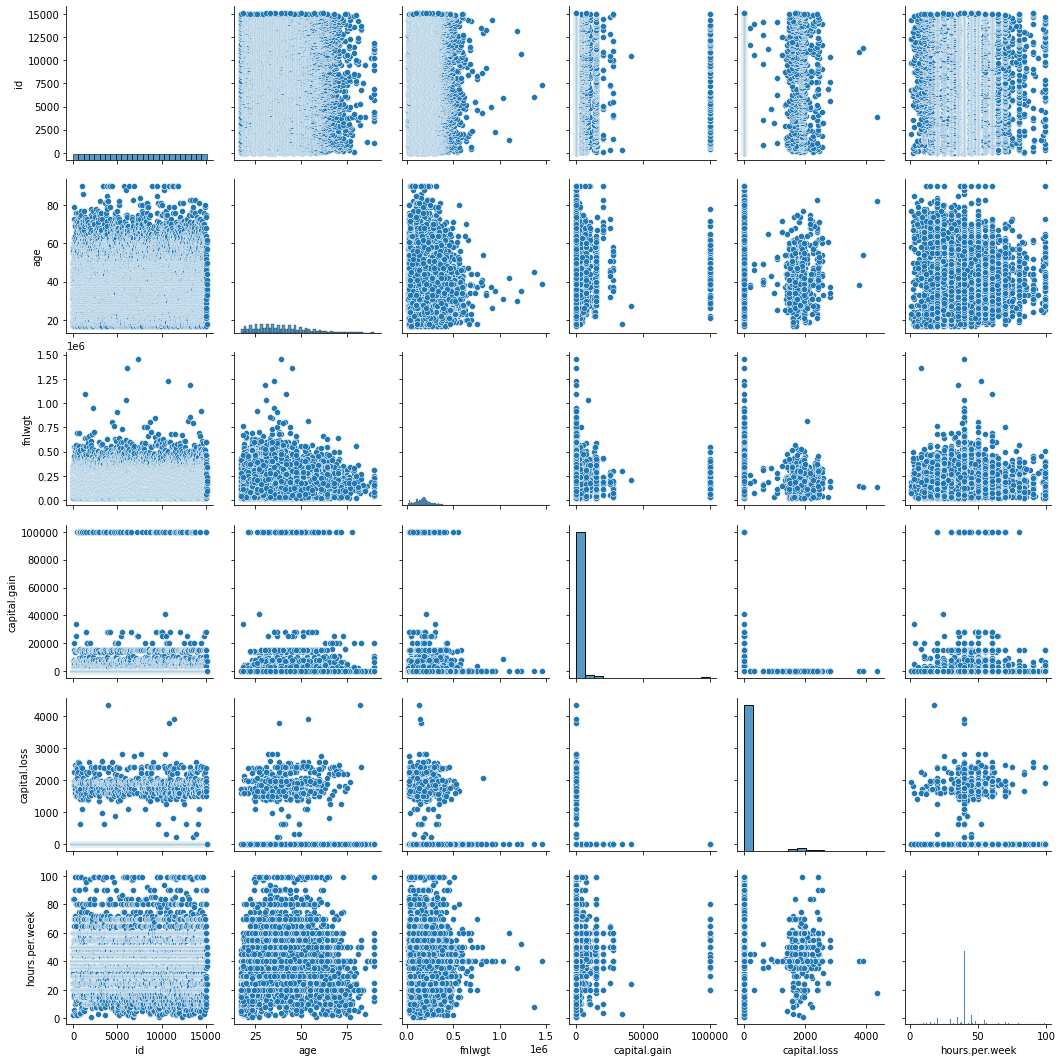

In [39]:
# numerical feature 시각화
import seaborn as sns
sns.pairplot(train[num_feat])

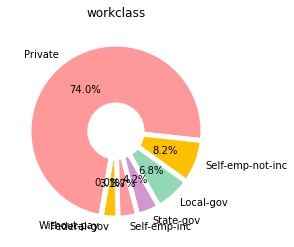

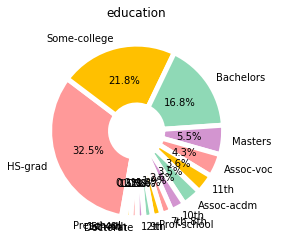

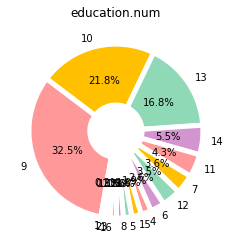

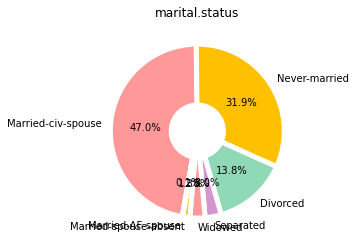

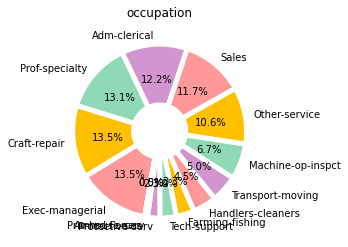

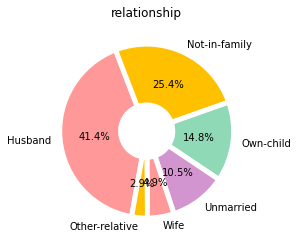

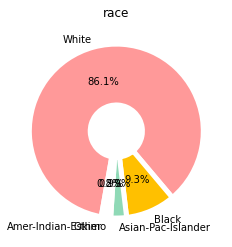

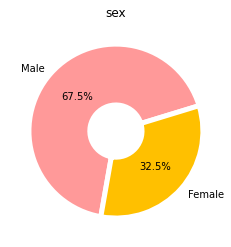

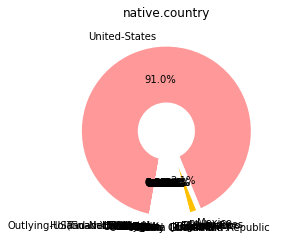

In [56]:
import matplotlib.pyplot as plt

# setting chart design
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

# pie chart는 matplotlib에만 있음
for i in range(len(cate_feat)):
    plt.pie(train[cate_feat[i]].value_counts(), labels=train[cate_feat[i]].value_counts().keys(), autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
    plt.title(cate_feat[i])
    plt.show()

In [47]:
t0 = train[train.target == 0]
t1 = train[train.target == 1]
print(f'target 0 : {t0.shape}')
print(f'target 1 : {t1.shape}')

target 0 : (11308, 16)
target 1 : (3773, 16)


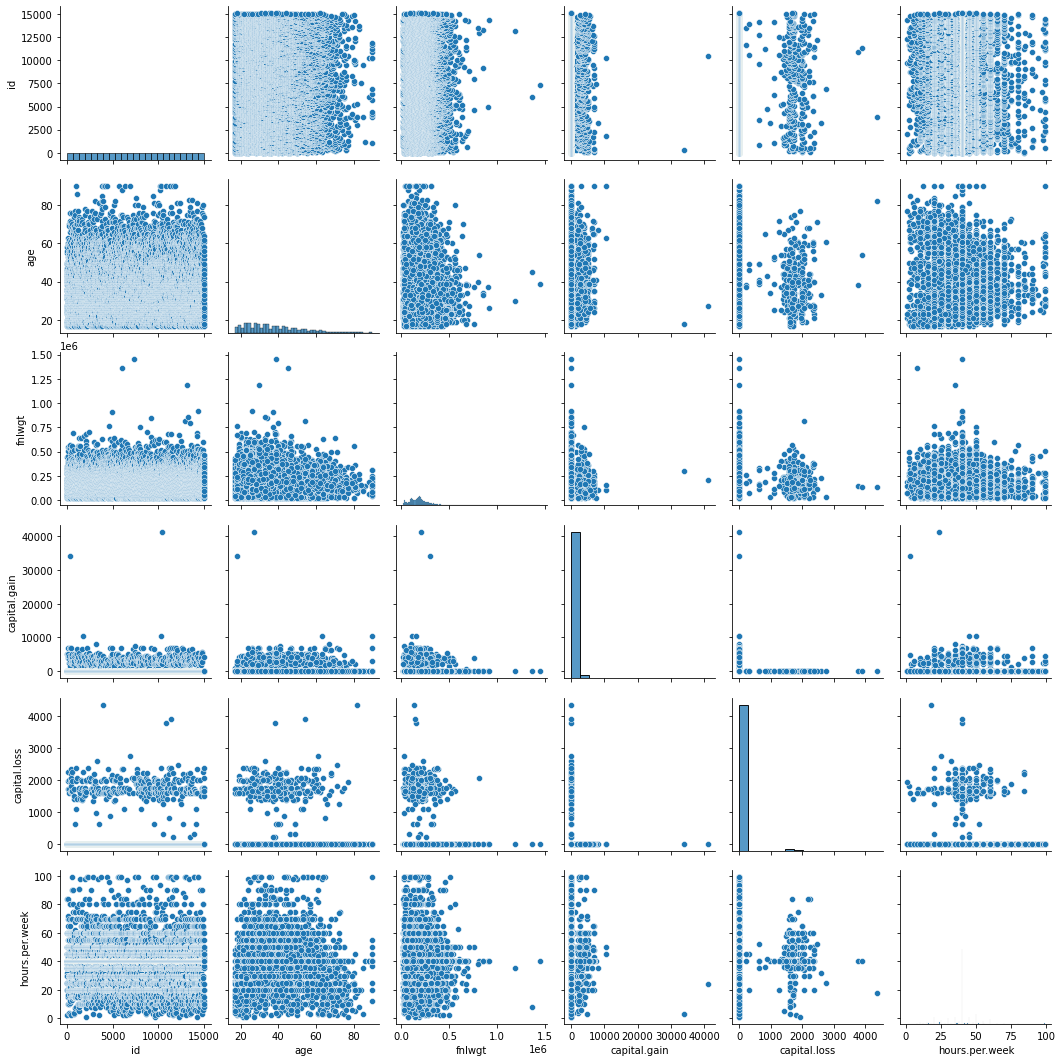

In [45]:
# numerical feature 시각화
import seaborn as sns
sns.pairplot(t0[num_feat])

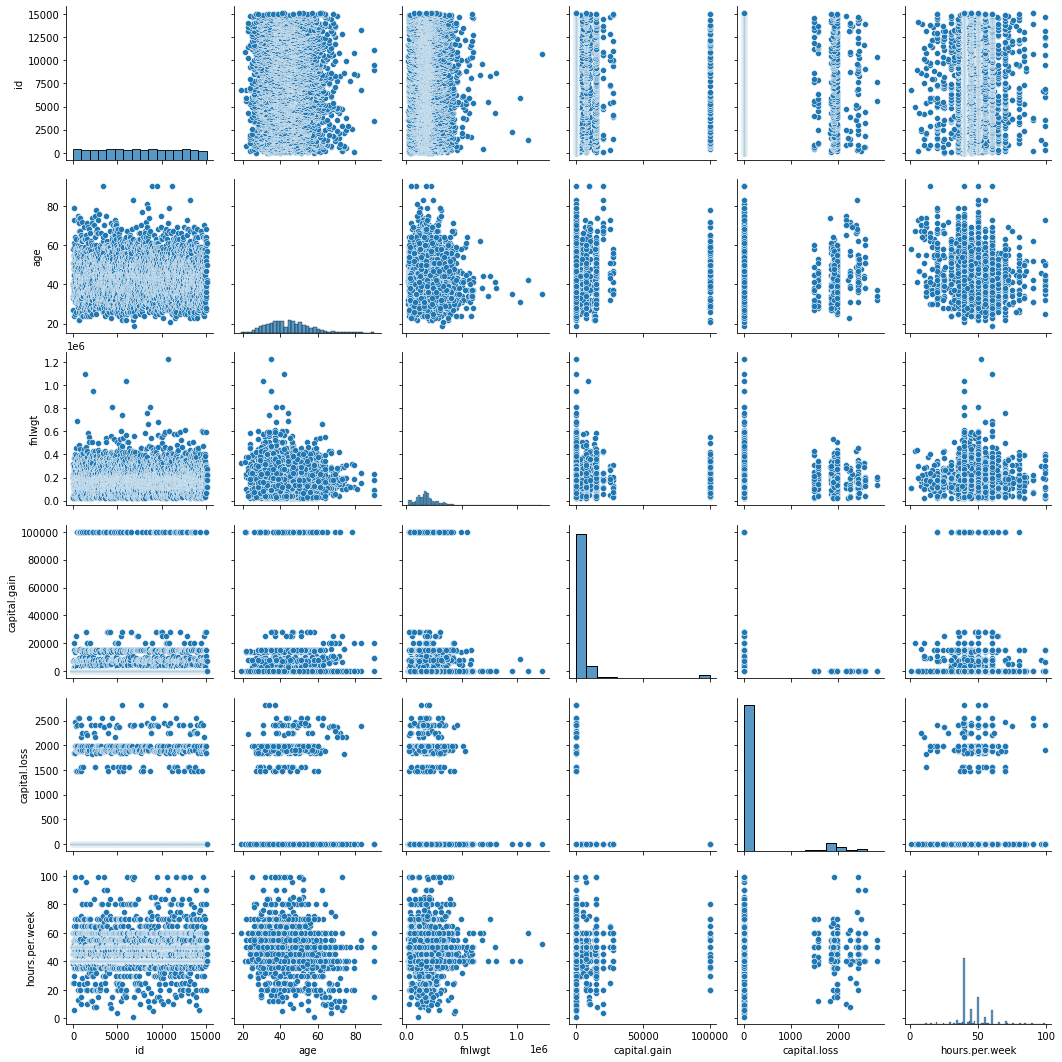

In [46]:
# numerical feature 시각화
import seaborn as sns
sns.pairplot(t1[num_feat])

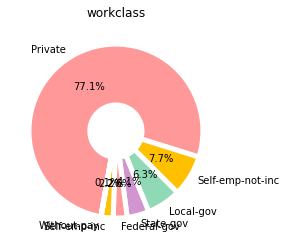

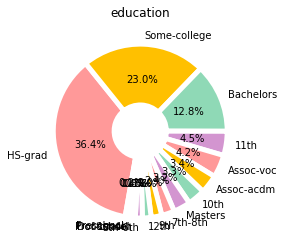

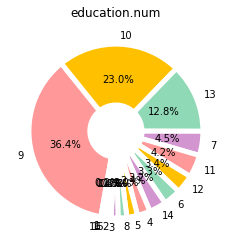

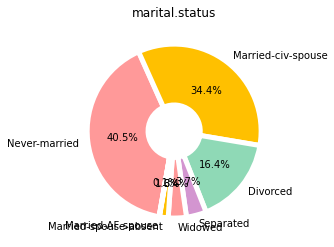

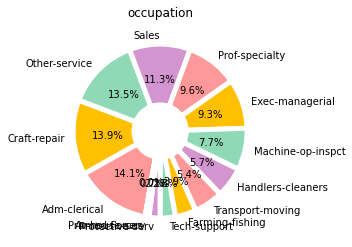

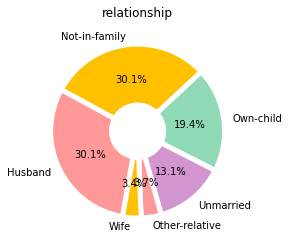

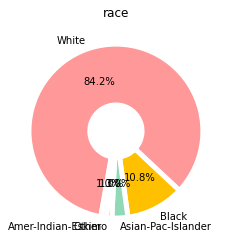

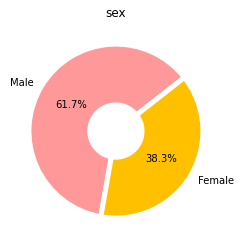

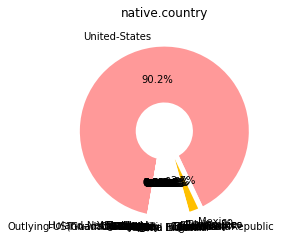

In [57]:
import matplotlib.pyplot as plt

# setting chart design
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

# pie chart는 matplotlib에만 있음
for i in range(len(cate_feat)):
    plt.pie(t0[cate_feat[i]].value_counts(), labels=t0[cate_feat[i]].value_counts().keys(), autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
    plt.title(cate_feat[i])
    plt.show()

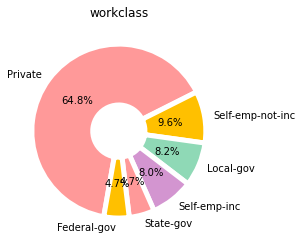

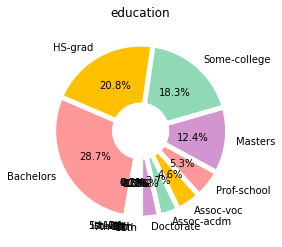

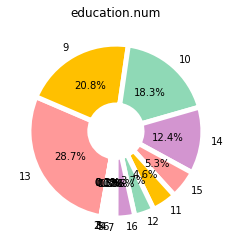

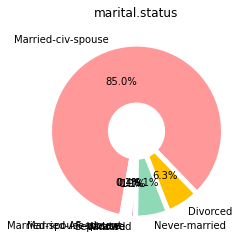

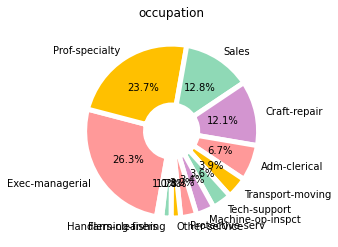

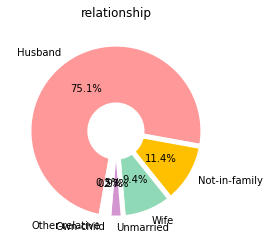

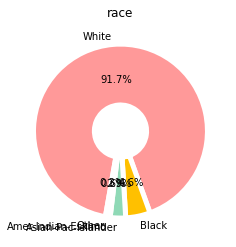

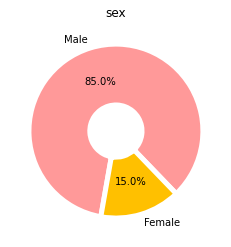

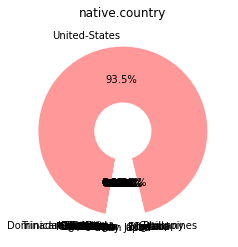

In [58]:
import matplotlib.pyplot as plt

# setting chart design
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

# pie chart는 matplotlib에만 있음
for i in range(len(cate_feat)):
    plt.pie(t1[cate_feat[i]].value_counts(), labels=t1[cate_feat[i]].value_counts().keys(), autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
    plt.title(cate_feat[i])
    plt.show()

In [59]:
# 범주형 변수 분포도
from IPython.display import display
print('numeric 타입이지만 범주형 변수의 경우 아래와 같은 분포를보인다')
for col in t0.columns[:-1]:
    target = t0[col]
    if target.nunique() <=50:
        print(col,target.unique())
        display(target.value_counts().to_frame())
        print()

numeric 타입이지만 범주형 변수의 경우 아래와 같은 분포를보인다
workclass ['Private' 'Local-gov' 'Self-emp-not-inc' 'Federal-gov' 'Self-emp-inc'
 'State-gov' 'Without-pay']


,workclass
Private,8713
Self-emp-not-inc,867
Local-gov,718
State-gov,462
Federal-gov,291
Self-emp-inc,251
Without-pay,6



education ['Assoc-acdm' 'Some-college' 'Bachelors' 'HS-grad' '10th' '11th' 'Masters'
 '7th-8th' '1st-4th' 'Assoc-voc' '5th-6th' '9th' '12th' 'Preschool'
 'Prof-school' 'Doctorate']


,education
HS-grad,4119
Some-college,2603
Bachelors,1449
11th,508
Assoc-voc,476
Assoc-acdm,390
10th,370
Masters,357
7th-8th,271
9th,223



education.num [12 10 13  9  6  7 14  4  2 11  3  5  8  1 15 16]


,education.num
9,4119
10,2603
13,1449
7,508
11,476
12,390
6,370
14,357
4,271
5,223



marital.status ['Married-civ-spouse' 'Never-married' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Widowed' 'Married-AF-spouse']


,marital.status
Never-married,4582
Married-civ-spouse,3885
Divorced,1850
Separated,420
Widowed,381
Married-spouse-absent,183
Married-AF-spouse,7



occupation ['Craft-repair' 'Adm-clerical' 'Prof-specialty' 'Machine-op-inspct'
 'Other-service' 'Sales' 'Farming-fishing' 'Transport-moving'
 'Exec-managerial' 'Handlers-cleaners' 'Tech-support' 'Protective-serv'
 'Priv-house-serv' 'Armed-Forces']


,occupation
Adm-clerical,1591
Craft-repair,1576
Other-service,1527
Sales,1280
Prof-specialty,1088
Exec-managerial,1047
Machine-op-inspct,876
Handlers-cleaners,639
Transport-moving,611
Farming-fishing,438



relationship ['Husband' 'Own-child' 'Not-in-family' 'Unmarried' 'Other-relative' 'Wife']


,relationship
Husband,3409
Not-in-family,3407
Own-child,2197
Unmarried,1486
Other-relative,422
Wife,387



race ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']


,race
White,9521
Black,1223
Asian-Pac-Islander,334
Amer-Indian-Eskimo,118
Other,112



sex ['Male' 'Female']


,sex
Male,6972
Female,4336



native.country ['United-States' 'Poland' 'Mexico' 'Guatemala' 'Dominican-Republic'
 'Greece' 'Portugal' 'El-Salvador' 'Canada' 'Philippines' 'India' 'Italy'
 'England' 'Jamaica' 'Columbia' 'South' 'Vietnam' 'Laos' 'Hong' 'Haiti'
 'Germany' 'Yugoslavia' 'Ecuador' 'Puerto-Rico' 'Cuba' 'Ireland'
 'Outlying-US(Guam-USVI-etc)' 'China' 'Honduras' 'Nicaragua' 'Hungary'
 'Peru' 'Japan' 'Cambodia' 'Iran' 'Taiwan' 'Trinadad&Tobago' 'Thailand'
 'France' 'Scotland' 'Holand-Netherlands']


,native.country
United-States,10199
Mexico,306
Philippines,68
Puerto-Rico,49
Germany,46
El-Salvador,45
Jamaica,39
Guatemala,35
Dominican-Republic,34
Cuba,33


In [60]:
# 범주형 변수 분포도
from IPython.display import display
print('numeric 타입이지만 범주형 변수의 경우 아래와 같은 분포를보인다')
for col in t1.columns[:-1]:
    target = t1[col]
    if target.nunique() <=50:
        print(col,target.unique())
        display(target.value_counts().to_frame())
        print()

numeric 타입이지만 범주형 변수의 경우 아래와 같은 분포를보인다
workclass ['Private' 'State-gov' 'Self-emp-not-inc' 'Self-emp-inc' 'Local-gov'
 'Federal-gov']


,workclass
Private,2445
Self-emp-not-inc,363
Local-gov,309
Self-emp-inc,301
State-gov,178
Federal-gov,177



education ['Some-college' 'Prof-school' '11th' 'Assoc-acdm' 'Bachelors' 'HS-grad'
 'Masters' 'Doctorate' '9th' '7th-8th' 'Assoc-voc' '10th' '5th-6th' '12th'
 '1st-4th']


,education
Bachelors,1082
HS-grad,786
Some-college,689
Masters,468
Prof-school,200
Assoc-voc,173
Assoc-acdm,139
Doctorate,132
11th,29
10th,27



education.num [10 15  7 12 13  9 14 16  5  4 11  6  3  8  2]


,education.num
13,1082
9,786
10,689
14,468
15,200
11,173
12,139
16,132
7,29
6,27



marital.status ['Married-civ-spouse' 'Married-AF-spouse' 'Never-married' 'Widowed'
 'Divorced' 'Married-spouse-absent' 'Separated']


,marital.status
Married-civ-spouse,3207
Divorced,236
Never-married,232
Widowed,43
Separated,34
Married-spouse-absent,16
Married-AF-spouse,5



occupation ['Exec-managerial' 'Prof-specialty' 'Craft-repair' 'Sales' 'Other-service'
 'Transport-moving' 'Machine-op-inspct' 'Protective-serv'
 'Farming-fishing' 'Adm-clerical' 'Tech-support' 'Handlers-cleaners']


,occupation
Exec-managerial,992
Prof-specialty,895
Sales,483
Craft-repair,456
Adm-clerical,253
Transport-moving,149
Tech-support,137
Machine-op-inspct,128
Protective-serv,112
Other-service,67



relationship ['Husband' 'Wife' 'Own-child' 'Not-in-family' 'Unmarried' 'Other-relative']


,relationship
Husband,2833
Not-in-family,429
Wife,355
Unmarried,102
Own-child,35
Other-relative,19



race ['White' 'Amer-Indian-Eskimo' 'Black' 'Asian-Pac-Islander' 'Other']


,race
White,3460
Black,172
Asian-Pac-Islander,108
Amer-Indian-Eskimo,22
Other,11



sex ['Male' 'Female']


,sex
Male,3208
Female,565



capital.gain [    0  7298 20051 15024  3103  7688 13550 25236 99999  5178  4386  9386
 15831 14084 10520  9562  4787 15020 27828  6514  4687  8614  6418  4934
 14344 10605  7430 25124  7896  5556]


,capital.gain
0,2981
15024,176
7688,136
7298,116
99999,76
5178,44
3103,44
8614,27
4386,20
14084,19



capital.loss [   0 1848 1977 2472 2392 1902 1485 2415 1887 2559 2547 2174 1564 2246
 2258 2201 1825 2377 2824 2444 2231 2282]


,capital.loss
0,3406
1902,91
1977,87
1887,67
2415,24
1848,21
1564,18
1485,17
2258,8
2559,6



native.country ['United-States' 'Ireland' 'El-Salvador' 'Canada' 'Greece' 'England'
 'Cuba' 'Philippines' 'Dominican-Republic' 'Jamaica' 'Germany' 'France'
 'Mexico' 'Taiwan' 'Japan' 'Ecuador' 'India' 'Peru' 'Cambodia' 'Italy'
 'Hungary' 'Iran' 'Laos' 'Puerto-Rico' 'Poland' 'Thailand' 'Hong' 'South'
 'Yugoslavia' 'China' 'Columbia' 'Vietnam' 'Trinadad&Tobago' 'Honduras']


,native.country
United-States,3528
Philippines,30
Germany,20
India,19
Canada,19
Mexico,16
England,14
Cuba,13
Japan,12
Iran,11


- `education`과 `education.num`은 겹치는 feature이므로 drop
- `native.country`는 대부분 미국이므로 drop

## 데이터 전처리

info() 메소드를 이용하여 데이터의 타입을 보면 상당히 많은 데이터가 범주형인 것을 확인 할 수 있습니다.


컴퓨터는 숫자만을 인식할 수 있기 때문에, 문자열로 이루어진 값을 숫자로 바꾸어주어야 합니다.

그래서 문자열 형식의 범주형 속성은 모두 숫자 값으로 변환/인코딩 되어야 합니다.

이번에 적용해볼 인코딩 방식은 'Label Encoding' 입니다.

Label Encoding이란, 범주형 변수의 문자열을 수치형으로 변환하는 방법 중 하나입니다.

Label Encoding을 통해 숫자형으로 표현해보겠습니다.

In [182]:
#라벨인코딩을 하기 위함 dictionary map 생성 함수
def make_label_map(dataframe):
    label_maps = {}
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            label_map = {'unknown':0}
            for i, key in enumerate(dataframe[col].unique()):
                label_map[key] = i  #새로 등장하는 유니크 값들에 대해 1부터 1씩 증가시켜 키값을 부여해줍니다.
            label_maps[col] = label_map
    return label_maps

# 각 범주형 변수에 인코딩 값을 부여하는 함수
def label_encoder(dataframe, label_map):
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            dataframe[col] = dataframe[col].map(label_map[col])
            #dataframe[col] = dataframe[col].fillna(label_map[col]['unknown']) #혹시 모를 결측값은 unknown의 값(0)으로 채워줍니다.
    return dataframe

train = label_encoder(train, make_label_map(train))

In [183]:
train = train.drop(['id', 'education', 'native.country'], axis=1)

In [133]:
train

,age,workclass,fnlwgt,education_num,marital.status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,target
0,32,0,309513,12,0,0,0,0,0,0,0,40,0
1,33,0,205469,10,0,1,0,0,0,0,0,40,1
2,46,0,149949,10,0,0,0,0,0,0,0,40,0
3,23,0,193090,13,1,2,1,0,1,0,0,30,0
4,55,0,60193,9,2,2,2,0,1,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17475,35,7,320084,13,0,14,4,0,1,0,0,55,1
17476,30,7,33811,13,1,14,2,2,1,0,0,99,0
17477,71,7,287372,16,0,14,0,0,0,0,0,10,1
17478,41,7,202822,9,3,14,2,1,1,0,0,32,0


In [110]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15081 entries, 0 to 15080
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             15081 non-null  int64
 1   workclass       15081 non-null  int64
 2   fnlwgt          15081 non-null  int64
 3   education.num   15081 non-null  int64
 4   marital.status  15081 non-null  int64
 5   occupation      15081 non-null  int64
 6   relationship    15081 non-null  int64
 7   race            15081 non-null  int64
 8   sex             15081 non-null  int64
 9   capital.gain    15081 non-null  int64
 10  capital.loss    15081 non-null  int64
 11  hours.per.week  15081 non-null  int64
 12  target          15081 non-null  int64
dtypes: int64(13)
memory usage: 2.1 MB


In [184]:
train.rename(columns = {'education.num' : 'education_num',
              'marital.status' : 'marital_status',
              'capital.gain' : 'capital_gain',
              'capital.loss' : 'capital_loss',
              'hours.per.week' : 'hours_per_week'}, inplace = True)

In [137]:
train

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,target
0,32,0,309513,12,0,0,0,0,0,0,0,40,0
1,33,0,205469,10,0,1,0,0,0,0,0,40,1
2,46,0,149949,10,0,0,0,0,0,0,0,40,0
3,23,0,193090,13,1,2,1,0,1,0,0,30,0
4,55,0,60193,9,2,2,2,0,1,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17475,35,7,320084,13,0,14,4,0,1,0,0,55,1
17476,30,7,33811,13,1,14,2,2,1,0,0,99,0
17477,71,7,287372,16,0,14,0,0,0,0,0,10,1
17478,41,7,202822,9,3,14,2,1,1,0,0,32,0


In [185]:
from statsmodels.formula.api import ols

ols_model = ols('target ~ ' + ' + '.join(train.columns[:-1]), train).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     534.5
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        19:24:25   Log-Likelihood:                -6106.0
No. Observations:               15081   AIC:                         1.224e+04
Df Residuals:                   15068   BIC:                         1.234e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.5270      0.020    -26.329      0.000      -0.566      -0.488
age                0.0066      0.000     28.072      0.000       0.006       0.007
workclass          0.0055      0.002      2.451      0.014       0.001       0.010
fnlwgt          8.345e-08   2.83e-08      2.953      0.003    2.81e-08    1.39e-07
education_num      0.0432      0.001     35.936      0.000       0.041       0.046
marital_status    -0.0647      0.003    -23.859      0.000      -0.070      -0.059
occupation        -0.0054      0.001     -5.497      0.000      -0.007      -0.003
relationship      -0.0172      0.003     -6.103      0.000      -0.023      -0.012
race              -0.0168      0.005     -3.474      0.001      -0.026      -0.007
sex               -0.0456      0.008     -5.719      0.000      -0.061      -0.030
capital_gain    8.835e-06      4e-07     22.091      0.000    8.05e-06    9.62e-06
capital_loss       0.0001    7.5e-06     14.757      0.000    9.59e-05       0.000
hours_per_week     0.0041      0.000     15.882      0.000       0.004       0.005
==============================================================================
Omnibus:                     1137.646   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1266.280
Skew:                           0.679   Prob(JB):                    1.07e-275
Kurtosis:                       2.584   Cond. No.                     1.47e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
pd.get_dummies(train, drop_first=True)

,id,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,target,workclass_Local-gov,workclass_Private,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,0,32,309513,12,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,33,205469,10,0,0,40,1,0,1,...,0,0,0,0,0,0,0,1,0,0
2,2,46,149949,10,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,3,23,193090,13,0,0,30,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,4,55,60193,9,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15076,15076,35,337286,14,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
15077,15077,36,182074,10,0,0,45,0,0,1,...,0,0,0,0,0,0,0,1,0,0
15078,15078,50,175070,15,0,0,45,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15079,15079,39,202937,10,0,0,40,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [186]:
# 분석에 필요 없는 id 와 예측하고자 하는 값 타겟을 제거해줍니다.

X = train.drop(['target'], axis=1)
# X = pd.get_dummies(X, drop_first=True)
y = train['target']

In [187]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
scaler.fit(X)
train_scaled = scaler.transform(X)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
train_scaled = pd.DataFrame(data=train_scaled, columns=train.columns[:-1])
print('feature들의 최소 값')
print(train_scaled.min())
print('\nfeature들의 최대 값')
print(train_scaled.max())

feature들의 최소 값
age               0.0
workclass         0.0
fnlwgt            0.0
education_num     0.0
marital_status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital_gain      0.0
capital_loss      0.0
hours_per_week    0.0
dtype: float64

feature들의 최대 값
age               1.0
workclass         1.0
fnlwgt            1.0
education_num     1.0
marital_status    1.0
occupation        1.0
relationship      1.0
race              1.0
sex               1.0
capital_gain      1.0
capital_loss      1.0
hours_per_week    1.0
dtype: float64


다음과 같이 Label Encoding을 통해서 데이터들이 모두 숫자형으로 변환됨을 확인할 수 있습니다.

## 변수 및 모델 정의

우리의 목적은 주어진 와인의 화학적 성분을 이용하여 와인의 품질, 맛 평점이 몇점인지를 예측하는 것입니다.

그럼 인구 데이터가 X, 수입이 y가 되겠죠?

따라서 모델 학습을 위해 학습 데이터와 타겟을 분리해보도록 하겠습니다.

정형데이터에서 가장 익숙한 Linear Regression을 진행해보도록 하겠습니다.

그런데 여기서는 예측하고자 하는 것이 연속적인 값을 갖는 수치 형태가 아닌, 1 단위로 끊어지는 분류 문제이기 때문에

category를 분류할 때 사용하는 LogisticRegression을 이용하여 진행하도록 하겠습니다.

In [166]:
from sklearn.linear_model import LogisticRegression

# 모델 선언
model = LogisticRegression(solver='liblinear')

# 모델 학습
model.fit(X, y)

LogisticRegression(solver='liblinear')

## 모델 성능 확인

굉장히 간단하게 학습이 끝났습니다.

이제 이 모델이 실제로 데이터를 얼마나 잘 맞추는지 확인해볼까요?

In [146]:
# 먼저 점수를 메기는 방법인 평가 지표(Metric)를 정의합니다.
import numpy as np

def ACCURACY(true, pred):   
    score = np.mean(true==pred)
    return score

In [167]:
# 모델의 예측과 실제 정답값을 비교합니다.
prediction = model.predict(X)

score = ACCURACY(y, prediction)

print(f"모델의 정확도는 {score*100:.2f}% 입니다")

모델의 정확도는 80.55% 입니다


In [188]:
# lgbm
from lightgbm import LGBMClassifier

lg_clf = LGBMClassifier()
lg_clf.fit(X, y)

lg_pred = lg_clf.predict(X)
score = ACCURACY(y, lg_pred)

print(f"모델의 정확도는 {score*100:.2f}% 입니다")

모델의 정확도는 89.44% 입니다


In [169]:
# lgbm
from lightgbm import LGBMClassifier

lg_clf = LGBMClassifier()
lg_clf.fit(X, y)

lg_pred = lg_clf.predict(X)
score = ACCURACY(y, lg_pred)

print(f"모델의 정확도는 {score*100:.2f}% 입니다")

모델의 정확도는 89.78% 입니다


## 추론 (Inference)

In [189]:
# csv형식으로 된 데이터 파일을 읽어옵니다.
test = pd.read_csv('./data/test.csv')
test.head()

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0,47,Private,304133,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
1,1,34,Self-emp-inc,154227,Some-college,10,Never-married,Sales,Not-in-family,White,Male,0,0,75,United-States
2,2,31,Local-gov,158291,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,8614,0,40,United-States
3,3,28,Private,183155,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,55,United-States
4,4,54,Local-gov,182543,Some-college,10,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,Mexico


In [193]:
test.rename(columns = {'education.num' : 'education_num',
              'marital.status' : 'marital_status',
              'capital.gain' : 'capital_gain',
              'capital.loss' : 'capital_loss',
              'hours.per.week' : 'hours_per_week'}, inplace = True)

마찬가지로 테스트 셋에서도 똑같이 전처리를 해줍니다.

In [190]:
test = label_encoder(test, make_label_map(test))
test = test.drop(['id', 'education', 'native.country'],axis=1)
test.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week
0,47,0,304133,10,0,0,0,0,0,0,0,45
1,34,1,154227,10,1,1,1,0,0,0,0,75
2,31,2,158291,13,1,2,1,0,0,8614,0,40
3,28,0,183155,13,0,3,0,0,0,0,0,55
4,54,2,182543,10,2,4,2,0,1,0,0,40


In [194]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
scaler.fit(test)
test_scaled = scaler.transform(test)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
train_scaled = pd.DataFrame(data=test_scaled, columns=test.columns)
print('feature들의 최소 값')
print(train_scaled.min())
print('\nfeature들의 최대 값')
print(train_scaled.max())

feature들의 최소 값
age               0.0
workclass         0.0
fnlwgt            0.0
education_num     0.0
marital_status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital_gain      0.0
capital_loss      0.0
hours_per_week    0.0
dtype: float64

feature들의 최대 값
age               1.0
workclass         1.0
fnlwgt            1.0
education_num     1.0
marital_status    1.0
occupation        1.0
relationship      1.0
race              1.0
sex               1.0
capital_gain      1.0
capital_loss      1.0
hours_per_week    1.0
dtype: float64


In [195]:
# 전처리가 완료된 테스트 데이터셋을 통해 본격적으로 학습한 모델로 추론을 시작합니다.
prediction = model.predict(test)
prediction

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

## Dacon 대회에 제출하기 (Submission)

이제 학습한 모델을 사용하여 이 예측 결과를 submission.csv 파일로 만들어서 대회 페이지에 제출해보도록 합시다.

제출한 뒤 리더보드를 통해 결과를 확인합시다.

In [196]:
# 제출용 Sample 파일을 불러옵니다
submission = pd.read_csv('./submit/sample_submission.csv')
submission.head()

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [197]:
submission['target'] = prediction

# 데이터가 잘 들어갔는지 확인합니다
submission

,id,target
0,0,0
1,1,0
2,2,1
3,3,0
4,4,0
...,...,...
15076,15076,1
15077,15077,0
15078,15078,0
15079,15079,0


submission을 csv 파일로 저장합니다.   
index=False란 추가적인 id를 부여할 필요가 없다는 뜻입니다.    
정확한 채점을 위해 꼭 index=False를 넣어주세요.

In [198]:
submission.to_csv('./submit/submit_scaled_lgbm.csv', index=False)

이렇게 생성된 submission.csv 파일을 데이콘 대회 페이지에 업로드 & 제출하여 결과를 확인해보세요!

문제를 해결하기 위한 여러분의 방법을 코드 공유 게시판에 공유해주세요

좋아요와 댓글을 합산하여 가장 높은 점수를 얻으신 분께 데이콘 후드가 제공됩니다!